In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

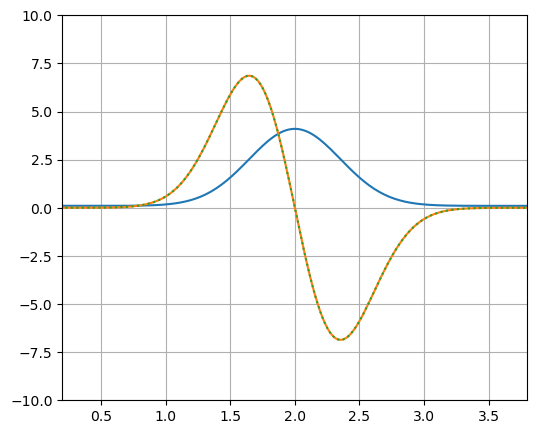

In [18]:
fig, ax = plt.subplots(figsize=(6,5))
ax.grid()
ax.set_xlim([0.2, 3.8])
ax.set_ylim([-10.0,10.0])

def gauss(xs, A=4.0, x0=2.0, sigm=0.5, c=0.1):
    return A*torch.exp(-((xs-x0)/sigm)**2)+c

def gaussp(xs, A=4.0, x0=2.0, sigm=0.5, c=0.0):
    return gauss(xs=xs, c=c)*(-2.0*(xs-x0)/sigm**2)

xs = torch.linspace(-2.0,4.0, 300, requires_grad=True)
ys = gauss(xs=xs)
ysp = torch.autograd.grad(ys,xs,torch.ones_like(ys))[0] 
with torch.no_grad():
    ax.plot(xs, ys)
    ax.plot(xs, ysp)
    ax.plot(xs, gaussp(xs), ':')

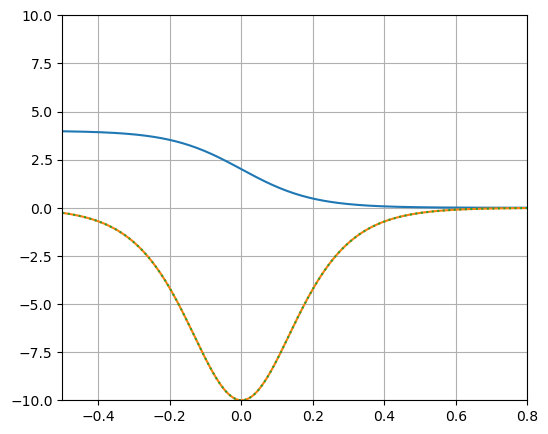

In [26]:
fig, ax = plt.subplots(figsize=(6,5))
ax.grid()
ax.set_xlim([-0.5, 0.8])
ax.set_ylim([-10.0,10.0])

def fermi_dir(energies, mu=1e-3, kbT=0.1, A=4.0, c=0.0):
    return 1.0/(torch.exp((energies-mu)/kbT)+1.0)*A + c

def fermi_dirp(energies, mu=1e-3, kbT=0.1, A=4.0, c=0.0):
    return -fermi_dir(energies=energies, A=1.0, c=0.0)**2*torch.exp((energies-mu)/kbT)/kbT*A

xs = torch.linspace(-0.5,1.0, 300, requires_grad=True)
ys = fermi_dir(energies=xs)
ysp = torch.autograd.grad(ys,xs,torch.ones_like(ys))[0]

with torch.no_grad():
    ax.plot(xs, ys)
    ax.plot(xs, ysp)
    ax.plot(xs, fermi_dirp(xs), ':')

